<a href="https://colab.research.google.com/github/glo-code/ecommerce-analysis/blob/main/ecommerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime

In [9]:
df=pd.read_csv('Amazon Sale Report.csv',parse_dates=True,low_memory=False)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103758,103758,406-4865361-8406758,06-18-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3799,JNE3799-KR-XL,kurta,...,INR,626.00,HSIIDC SOHNA,HARYANA,122103.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
103759,103759,171-6951814-7602764,06-18-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3691,JNE3691-TU-XXL,Top,...,INR,649.00,BENGALURU,KARNATAKA,560100.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
103760,103760,404-9162168-9409155,06-18-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET436,SET436-KR-NP-M,Set,...,INR,1315.00,HYDERABAD,TELANGANA,500076.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
103761,103761,405-4356721-5304346,06-18-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET288,SET288-KR-NP-M,Set,...,INR,650.00,VIRAJPETE,KARNATAKA,571214.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False




```
Indagine sui clienti


```



Ordine ID e Status

In [57]:
data=pd.to_datetime(df['Date'])
df['months']=data.dt.month_name()
df['year']=data.dt.year
df['day']=data.dt.day


group=df.groupby(['day','months','year'])[['Order ID','Status']].value_counts().reset_index()
mask=np.where(group['count']<group['count'].max())[0]
print('Order less than max:',group['count'].iloc[mask].sum(),'in the day:',group.iloc[mask])
mask2=group['count'][group['count']==group['count'].max()]
'Order == max:',mask2.value_counts(),'in the day:',group.iloc[mask2.index]


<ipython-input-57-c4cc771dfd87>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.to_datetime(df['Date'])


Order less than max: 103739 in the day:        day months  year             Order ID                        Status  \
0        1  April  2022  403-9984530-4477124                       Shipped   
1        1  April  2022  407-3670630-4326760                       Shipped   
2        1  April  2022  404-5543645-7254764                       Shipped   
3        1  April  2022  406-0389022-3398734                       Shipped   
4        1  April  2022  405-1058598-7066734                       Shipped   
...    ...    ...   ...                  ...                           ...   
96841   31    May  2022  402-3129179-0749965  Shipped - Delivered to Buyer   
96842   31    May  2022  402-3061224-5542727                       Shipped   
96843   31    May  2022  402-2947901-1482721                     Cancelled   
96844   31    May  2022  402-2942715-0621953  Shipped - Delivered to Buyer   
96845   31    May  2022  408-9910860-9722745                     Cancelled   

       count  
0       

('Order == max:',
 count
 12    2
 Name: count, dtype: int64,
 'in the day:',
        day months  year             Order ID     Status  count
 30000   11  April  2022  403-4984515-8861958    Shipped     12
 31482   11    May  2022  171-5057375-2831560  Cancelled     12)

Notiamo che il massimo di ordini da parte di un cliente è di 12 mentre il minimo è 1.Il massimo di ordini si è verificato sia ad aprile che a maggio, soltanto che a maggio si è trattato non di ordini spediti ma cancellati dallo stesso cliente.
Abbiamo invece contro i 2 ordini più alti, 91354 ordini minimi da più clienti.


In [64]:
count=group.groupby('months')['Status'].value_counts().unstack()
count=count.fillna(0).astype(int)
count

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Ship,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller
months,,,,,,,,,,,,,
April,6726,1,0,0,27176,0,11093,2,1,2,6,849,2
June,1645,572,262,1,6813,1,1368,0,24,899,5,17,90
March,18,0,0,0,123,0,16,0,0,0,0,1,0
May,5469,6,0,0,23433,0,9547,2,1,5,0,661,9


Status  Cancelled    Pending  Pending - Waiting for Pick Up   Ship    Shipped  \
months                                                                          
April   48.535142   0.172712                            0.0    0.0  47.225649   
June    11.870400  98.791019                          100.0  100.0  11.839430   
March    0.129889   0.000000                            0.0    0.0   0.213746   
May     39.464569   1.036269                            0.0    0.0  40.721175   

Status  Shipped - Damaged  Shipped - Delivered to Buyer  \
months                                                    
April                 0.0                     50.367781   
June                100.0                      6.211406   
March                 0.0                      0.072648   
May                   0.0                     43.348166   

Status  Shipped - Lost in Transit  Shipped - Out for Delivery  \
months                                                          
April                       

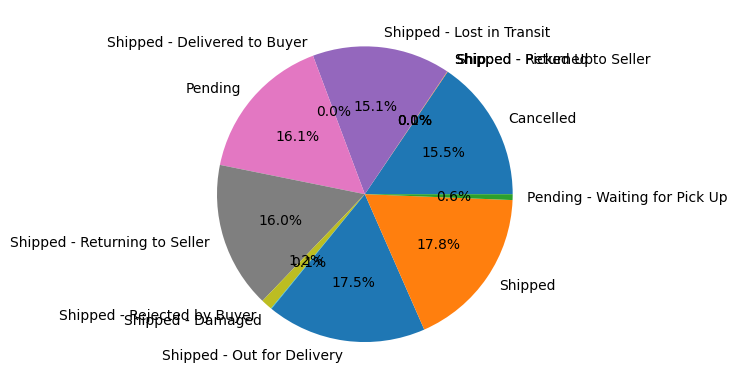

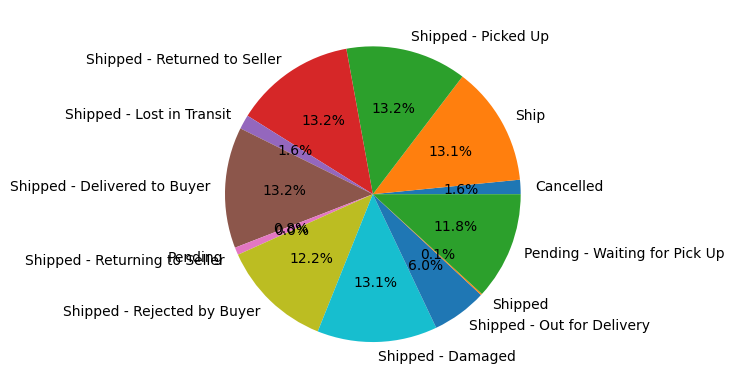

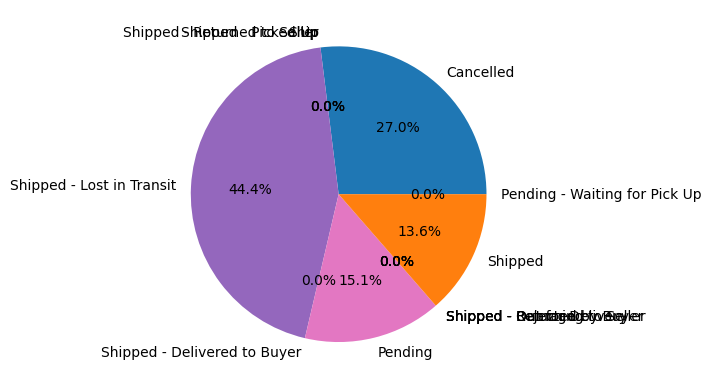

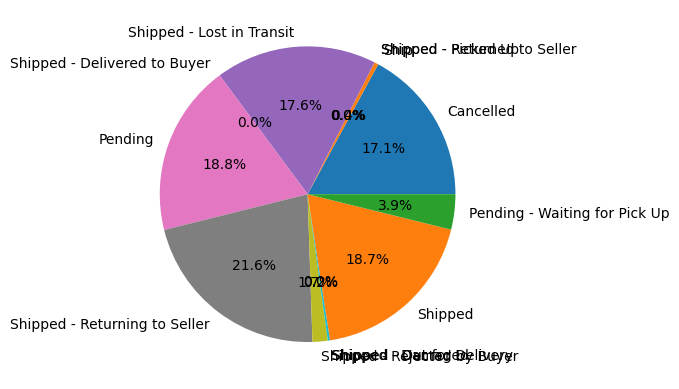

In [105]:
perc_precise=count/count.sum()*100
perc_precise.round(2).reset_index()


labels=set(df['Status'])

conteggio=0
for categorie in perc_precise:
    categorie=perc_precise.iloc[conteggio]
    print(categorie.name)
    ax,fig=plt.subplots()
    plt.pie(categorie,labels=labels,autopct='%1.1f%%')
    conteggio=conteggio+1
    if conteggio==len(perc_precise.index):
       break


Ordini per mese 0    12577
1    41948
2    49067
3      171
dtype: int64
Ordini totali 103763


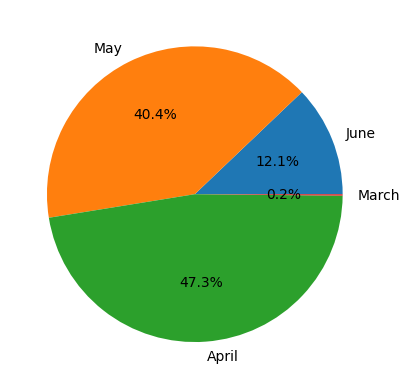

In [61]:
lista_mesi=['June','May','April','March']
ordini_totali=[]
for mese in lista_mesi:
    result=group['count'][group['months']==mese].sum()
    ordini_totali.append(result)

ordini_totali=pd.Series(ordini_totali)
print('Ordini per mese',ordini_totali)
print('Ordini totali',ordini_totali.sum())
perc=ordini_totali/ordini_totali.sum()*100
perc=perc.round(2)

ax,fig=plt.subplots()
plt.pie(perc,labels=lista_mesi,autopct='%1.1f%%')
plt.show()



Notiamo che ad Aprile abbiamo il maggior numero di ordini spediti (17.8%) e cancellati (15,5%). Abbiamo anche un modesto numero di ordini ritornati al venditore e in sospeso(16%). A giugno invece alto numero di ordini spediti ma anche cancellati anche se sono di meno rispetto ad aprile. Pochi però i resi e molti sospesi. A marzo nessun ordine sospeso e pochi cancellati ma ben il 44% degli ordini persi nel transito e 27% cancellati rispetto al 15,5% di aprile. E' il mese in cui si hanno avuti meno ordini. A maggio la maggior parte spediti e cancellati ed un numero moderato minore rispetto ad aprile di resi (21.6% rispetto al 16% di aprile). Pochi sospesi (18% rispetto ad aprile) e il 17% di persi nel transito e cancellati.

Quindi si è venduto di più tra aprile e maggio (47% e 40%) e modertamente a giugno (12%) e di meno a marzo (0.2%).



,Status,count
0,Shipped,59.14
1,Shipped - Delivered to Buyer,23.08
2,Cancelled,14.24
3,Shipped - Returned to Seller,1.56
4,Shipped - Picked Up,0.93
5,Pending,0.63
6,Pending - Waiting for Pick Up,0.27
7,Shipped - Returning to Seller,0.11
8,Shipped - Out for Delivery,0.03
9,Shipped - Rejected by Buyer,0.01


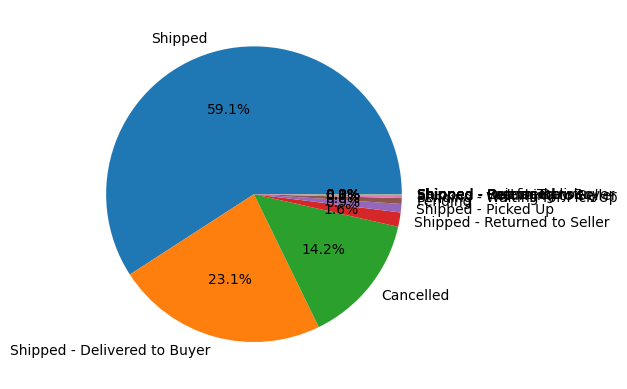

In [12]:
total=df['Status'].value_counts().sum()
status=df['Status'].value_counts().apply(lambda x:x/total*100).round(2).reset_index()
#status=status[status['count']!=0.0]
value=status['count']
fig,ax=plt.subplots()
labels=status['Status']
plt.pie(value,labels=labels,autopct='%1.1f%%')#,startangle=90,shadow=True,labeldistance=0.80,pctdistance=0.5)
status

Notiamo che la maggior parte degli ordini nei mesi indicati, sono stati spediti (circa il 58,8%) mentre il 25 % è stato spedito e consegnato al compratore. Il 14% invece è stato cancellato mentre soltanto 1.8% degli ordini è stato mandato indietro.
Soltanto per il 0,2% invece è stato effettuato il reso ma ancora l'ordine non è ritornato al venditore.



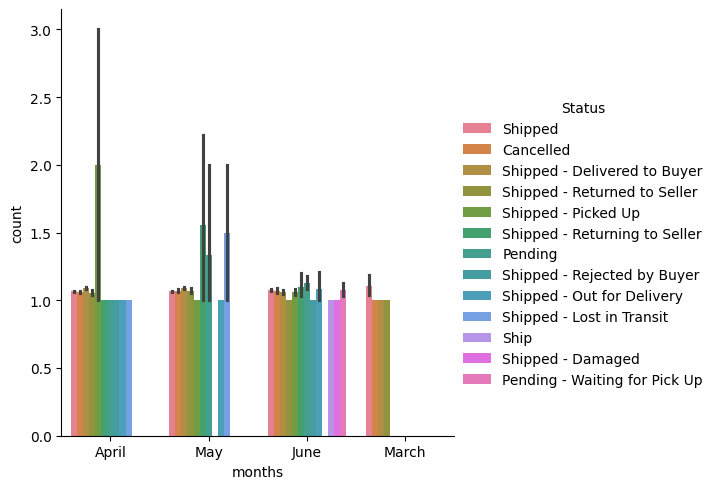

,day,months,year,Order ID,Status,count
0,1,April,2022,403-9984530-4477124,Shipped,7
1,1,April,2022,407-3670630-4326760,Shipped,4
2,1,April,2022,404-5543645-7254764,Shipped,4
3,1,April,2022,406-0389022-3398734,Shipped,3
4,1,April,2022,405-1058598-7066734,Shipped,3
...,...,...,...,...,...,...
96841,31,May,2022,402-3129179-0749965,Shipped - Delivered to Buyer,1
96842,31,May,2022,402-3061224-5542727,Shipped,1
96843,31,May,2022,402-2947901-1482721,Cancelled,1
96844,31,May,2022,402-2942715-0621953,Shipped - Delivered to Buyer,1


In [13]:

sns.catplot(group,x=group['months'],y=group['count'],kind='bar',hue='Status')
plt.show()
group

Tipo di prodotto acquistato


In [107]:
df['Category'].value_counts()

Category
Set              41048
kurta            39635
Western Dress    12009
Top               8840
Ethnic Dress       892
Blouse             805
Bottom             392
Saree              138
Dupatta              3
Name: count, dtype: int64